# Cells 1: Load required packages. 

In [1]:
import sys

sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')


import arepo_package
import scipy.interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

group_ids=arepo_package.generate_group_ids(basePath,0,5)

Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
Constructing_group_ids
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
Reading group lengths
Constructing offsets
1182
1163
1154
1142
1139
1134
1126
1114
1101
1091
1084
1079
1073
1064
1061
1057
1055
1046
1043
1038
1034
1028
1026
1023
1019
1014
1012
1010
1008
1003
998
996
995
993
989
985
982
977
971
969
967
965
964
960
958
957
955
954
953
951
949
947
945
944
941
940
937
936
935
933
932
930
928
926
925
922
921
919
918
915
912
911
908
907
906
905
904
903
902
900
898
897
896
894
892
891
889
887
886
884
883
881
880
879
878
876
874
873
872
871
870
869
868
865
864
863
862
861
860
859
858
857
855
854
851
849
848
846
845
844
843
841
840
839
837
836
835
834
833
832
831
828
827
826
825
823
822
821
819
818
816
815
814
813
811
810
808
807
805
804
803
802
801
800
798
796
795
794
793
791
790
789
787
786
785
783
782
781
779
778
776
774
773
772
770
769
768
767
765
764
763
761
759
758
757


In [9]:
group_ids

array([ 0.,  0.,  1.,  3.,  4.,  5.,  6.,  7.,  8., 12., 13., 14., 15.,
       16., 17., 18.])

# Cells 2 and 3 Generating dark matter correlation functions and plotting them

In [2]:
NBINS = 20
RMIN = 10**(-3)
RMAX = 10**1
WRAP = False

subsample_factor=500
basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

for z in [0,1,2,3]:
    r,DD,RR,xi,output_redshift=arepo_package.get_dark_matter_correlation_function(basePath,z,NBINS, RMIN, RMAX, WRAP,subsample_factor)
    dxi=numpy.sqrt(DD)/RR
    numpy.save('./arepo_dark_matter_correlation/z%.2f.npy'%z,[r,xi,dxi,output_redshift])
    

#basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new/output/'
#r_laura,DD_laura,RR_laura,xi_laura,output_redshift=arepo_package.get_dark_matter_correlation_function(basePath,z,NBINS, RMIN, RMAX, WRAP,subsample_factor)





Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  1
Output redshift:  0.9972942257819404
Output snapshot:  12
Below are the list of properties for ptype  1


KeyboardInterrupt: 

Text(0, 0.5, '$\\xi(r)$')

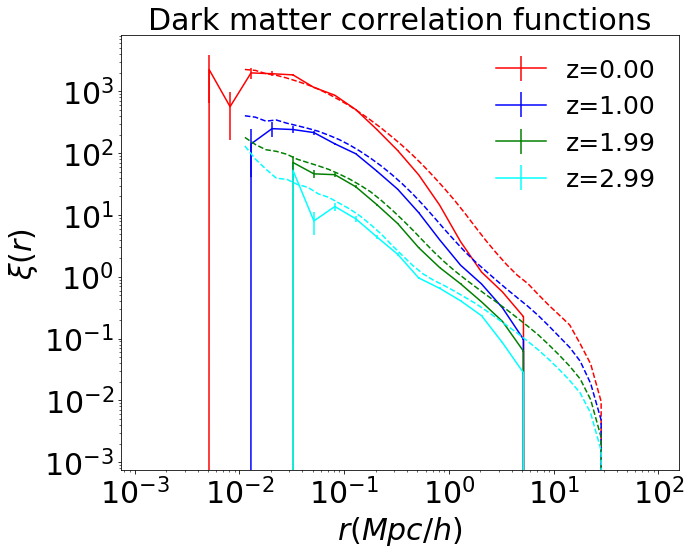

In [4]:
f,ax=plt.subplots(figsize=(10,8))

ax.set_title('Dark matter correlation functions',fontsize=30)
for z,col in zip([0,1,2,3],['red','blue','green','cyan']):
    r,xi,dxi,output_redshift=numpy.load('./arepo_dark_matter_correlation/z%.2f.npy'%z)
    ax.errorbar(r,xi,dxi,color=col,label='z=%.2f'%output_redshift)
    if (z==0):
        z=0.06
    
    r_space=numpy.load('/home/aklantbhowmick/dm_correlation_functions_mb2/z%.2f_rspace_p_mb2.npy'%z)
    xi_space=numpy.load('/home/aklantbhowmick/dm_correlation_functions_mb2/z%.2f_xi_space_mb2.npy'%z)
    
    #r_space=numpy.load('/home/aklantbhowmick/linear_matter_correlation/'%z)
    #xi_space=numpy.load('/home/aklantbhowmick/linear_matter_correlation/z%.2f_xi_space.npy'%z)
    
    
    ax.errorbar(r_space,xi_space,linestyle='dashed',color=col)    

ax.legend(loc='upper right',fontsize=25,frameon=False)    
ax.tick_params(labelsize=30)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$r(Mpc/h)$',fontsize=30)
ax.set_ylabel(r'$\xi(r)$',fontsize=30)

# Cell 4: Generating halo mass funtion

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37729941e-13
 1.30449799e-13 9.60227253e-14 2.32217592e-14 6.00830146e-15
 1.40180052e-15 3.28298290e-16 8.15841762e-17 2.15040126e-17
 6.20902921e-18 1.33626209e-18]
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.77065664e-13 9.68887126e-14 2.36219996e-14 5.16445444e-15
 1.02541274e-15 1.83116037e-16 3.15974156e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22780191e-13 6.92800797e-14 1.34292678e-14 2.61208055e-15
 3.93871944e-16 4.89398195e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7


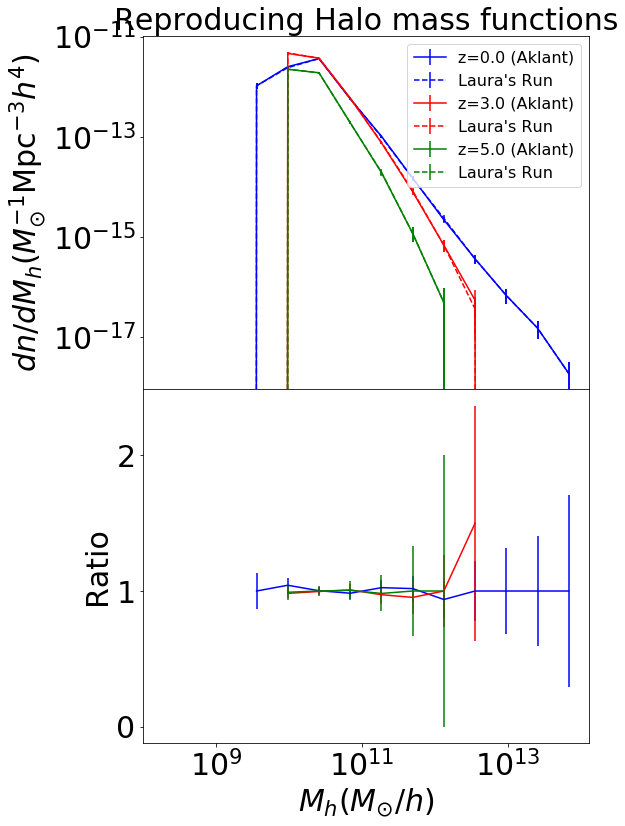

In [27]:
f,ax=plt.subplots(2,1,figsize=(8,13),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=14
ax[0].set_title('Reproducing Halo mass functions',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='group'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='total'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    object_type='group'
    basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's Run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)



ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





In [18]:
HM_sp

array([3.27096344e-04, 6.57212769e-04, 1.32049359e-03, 2.65317929e-03,
       5.33085539e-03, 1.07109306e-02, 2.15207552e-02, 4.32402117e-02,
       8.68796603e-02, 1.74561481e-01, 3.50734688e-01, 7.04707710e-01,
       1.41592199e+00, 2.84491719e+00, 5.71610151e+00, 1.14849798e+01,
       2.30760004e+01, 4.63650616e+01, 9.31582120e+01, 1.87176554e+02,
       3.76081310e+02, 7.55634979e+02, 1.51824674e+03, 3.05051145e+03,
       6.12918828e+03, 1.23149674e+04, 2.47436389e+04, 4.97157358e+04,
       9.98904972e+04, 2.00703284e+05, 4.03259661e+05, 8.10242620e+05,
       1.62796621e+06, 3.27096344e+06, 6.57212769e+06, 1.32049359e+07,
       2.65317929e+07, 5.33085539e+07, 1.07109306e+08, 2.15207552e+08,
       4.32402117e+08, 8.68796603e+08, 1.74561481e+09, 3.50734688e+09,
       7.04707710e+09, 1.41592199e+10, 2.84491719e+10, 5.71610151e+10,
       1.14849798e+11, 2.30760004e+11, 4.63650616e+11, 9.31582120e+11,
       1.87176554e+12, 3.76081310e+12, 7.55634979e+12, 1.51824674e+13,
      

# Cell 4: Generating halo mass funtion: Comparing with Spherical Collapse model predictions

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.37729941e-13
 1.30449799e-13 9.60227253e-14 2.32217592e-14 6.00830146e-15
 1.40180052e-15 3.28298290e-16 8.15841762e-17 2.15040126e-17
 6.20902921e-18 1.33626209e-18]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.77065664e-13 9.68887126e-14 2.36219996e-14 5.16445444e-15
 1.02541274e-15 1.83116037e-16 3.15974156e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.22780191e-13 6.92800797e-14 1.34292678e-14 2.61208055e-15
 3.93871944e-16 4.89398195e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


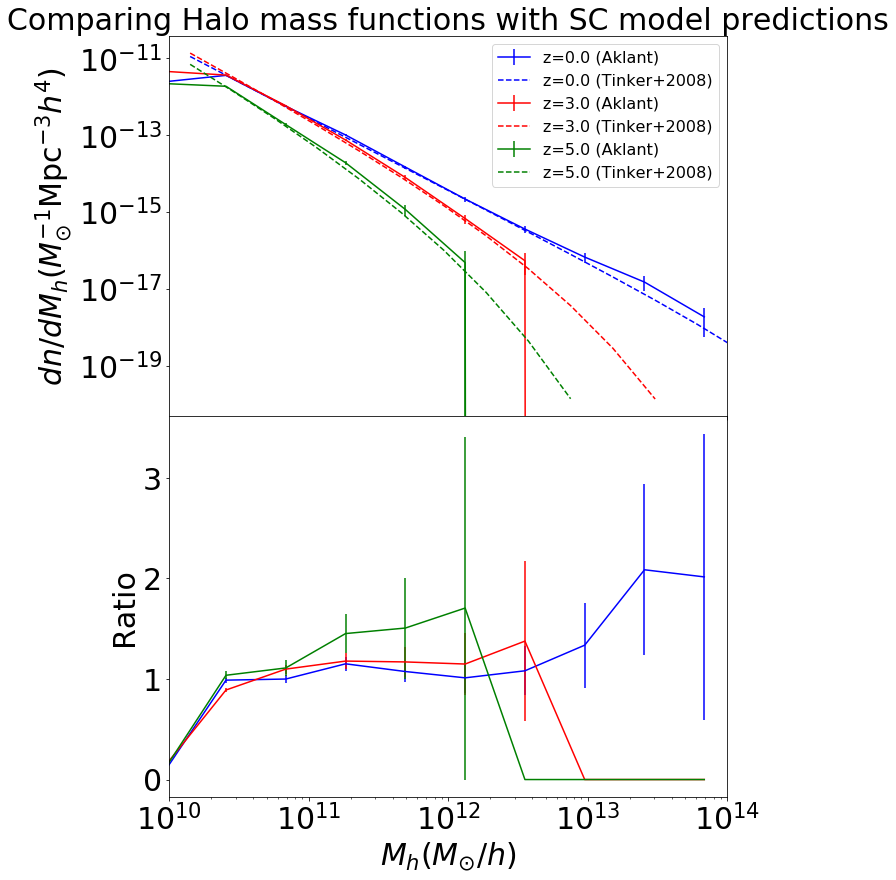

In [37]:
f,ax=plt.subplots(2,1,figsize=(10,14),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=14
ax[0].set_title('Comparing Halo mass functions with SC model predictions',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='group'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='total'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)
    
    
    HM_sp,HMF_sp=numpy.load('../spherical_collapse_model/mass_functions/mass_function_z%.1f.npy'%desired_redshift)
    
    mask=(HMF_sp>1e-20)&(HM_sp>1e10)
    
    
    ax[0].errorbar(HM_sp[mask],HMF_sp[mask],color=col,label='z=%.1f (Tinker+2008)'%output_redshift,linestyle='dashed')
    

    gen_HMF_sp=scipy.interpolate.interp1d(numpy.log10(HM_sp[mask]),numpy.log10(HMF_sp[mask]),fill_value='extrapolate')
    
    HMF_centers_sp=10**gen_HMF_sp(numpy.log10(centers))
    
    #object_type='group'
    #basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    #centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    #ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's Run")
    
    ax[1].errorbar(centers,HMF/HMF_centers_sp,dHMF/HMF_centers_sp,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    

ax[0].set_xlim(1e10,1e14)    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)



ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 5: Generating galaxy stellar mass funtion

Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19
[5.90071777e-12 2.93790969e-12 1.19472784e-12 5.68643709e-13
 2.94527569e-13 1.71451184e-13 6.53570223e-14 2.57120632e-14
 1.49883495e-14 7.55612230e-15 2.76738572e-15 9.55573617e-16
 2.47468468e-16 0.00000000e+00]
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  19


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
[8.70673890e-12 3.18879234e-12 1.06859706e-12 5.53477143e-13
 2.13672756e-13 8.57255918e-14 3.84526998e-14 1.48448666e-14
 4.86286272e-15 1.78099511e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  3.0
Output redshift:  2.9891842243418814
Output snapshot:  9
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7
[4.69435901e-12 1.94514509e-12 5.34298532e-13 9.22461906e-14
 9.55573617e-14 3.49973263e-14 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Desired redshift:  5.0
Output redshift:  4.995933468164624
Output snapshot:  7


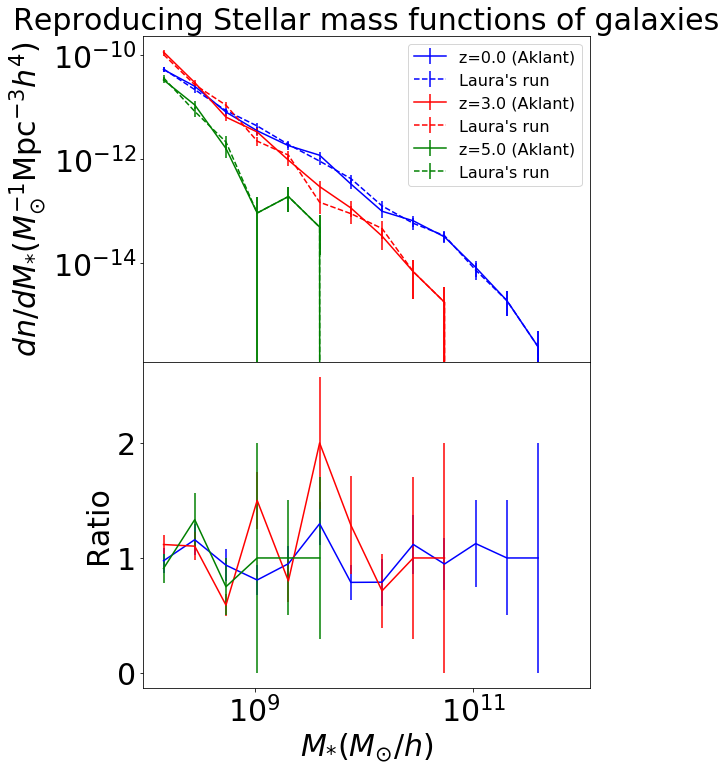

In [6]:
f,ax=plt.subplots(2,1,figsize=(8,12),sharex=True)
Nbins=15
log_mass_min=8
log_mass_max=12
#p_type=4

ax[0].set_title('Reproducing Stellar mass functions of galaxies',fontsize=30)
for desired_redshift,col in zip([0.,3., 5.],['blue','red','green']):
    object_type='subhalo'
    basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
    category='stellar'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    #object_type='subhalo'
    basePath='/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_bhs_gfm_mod2_ompi_new_ddfrac0.05/output/'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col,label="Laura's run")
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{*}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{*}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)


ax[1].set_ylabel('Ratio',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 6: Generating galaxy black hole mass funtion

[4.52425622e-10 9.82489246e-11 2.07634069e-11 6.31948311e-12
 1.52056331e-12 6.20902921e-13 3.13381238e-13 4.98104217e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


[4.22655443e-10 8.90456498e-11 2.76845426e-11 5.15983635e-12
 6.80016587e-13 5.06965112e-13 2.83463995e-13 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[3.64331825e-10 7.76725948e-11 1.38422713e-11 3.64855528e-12
 9.61688680e-13 2.53482556e-13 1.88975997e-13 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


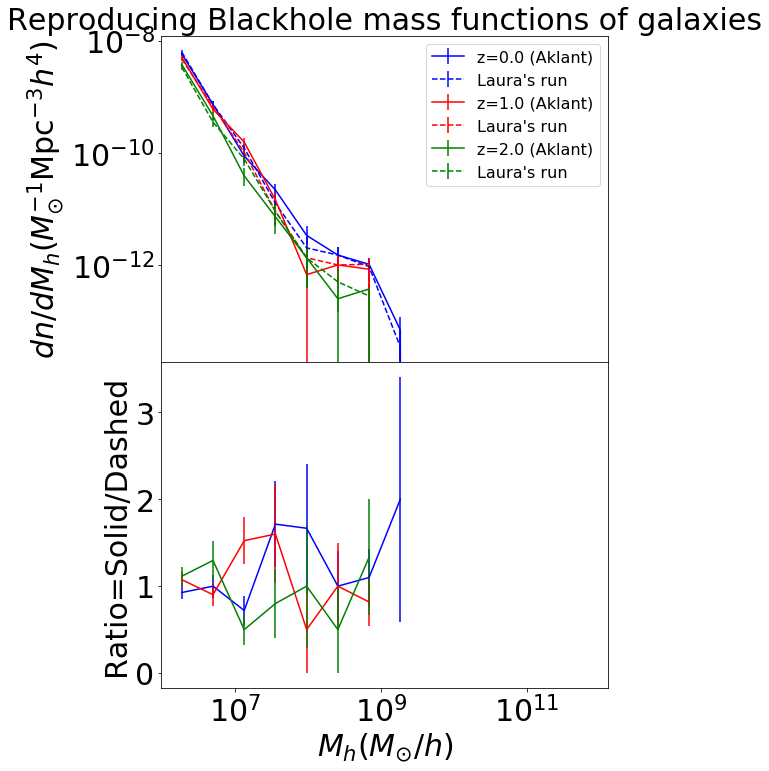

In [4]:
f,ax=plt.subplots(2,1,figsize=(8,12),sharex=True)
Nbins=15
log_mass_min=6
log_mass_max=12
#p_type=4

ax[0].set_title('Reproducing Blackhole mass functions of galaxies',fontsize=30)
for desired_redshift,col in zip([0.,1, 2.],['blue','red','green']):
    object_type='subhalo'
    basePath = '/ufrc/lblecha/lblecha/arepo_runs/L25n128_ngenic_test/output/'
    category='bh'
    centers,HMF,dHMF,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    print(dHMF)
    ax[0].errorbar(centers,HMF,dHMF,color=col,label='z=%.1f (Aklant)'%output_redshift)

    
    #object_type='subhalo'
    basePath='/ufrc/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/code_development/AREPO/output_test128_FOF//'
    centers_laura,HMF_laura,dHMF_laura,output_redshift=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max,list_all=False)
    ax[0].errorbar(centers_laura,HMF_laura,dHMF_laura,color=col,linestyle='dashed',label="Laura's run")
    
    ax[1].errorbar(centers,HMF/HMF_laura,dHMF/HMF_laura,color=col)
    
#    object_type='subhalo'
#    centers,HMF,dHMF=arepo_package.get_mass_function(category,object_type,desired_redshift,basePath,Nbins,log_mass_min,log_mass_max)
#    ax.errorbar(centers,HMF,dHMF)
#    print("-----------")
    
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)

ax[1].set_xlabel('$M_{h}(M_{\odot}/h)$',fontsize=30)

ax[0].set_ylabel('$dn/dM_{h}(M_{\odot}^{-1} \mathrm{Mpc}^{-3}h^4)$',fontsize=30)

ax[0].legend(loc='upper right',fontsize=16)

ax[1].set_ylabel('Ratio=Solid/Dashed',fontsize=30)

plt.subplots_adjust(hspace=0)





# Cell 7: Generating ids of particles to be tracked. Currently set to find the 10 most massive black holes. Modify the function 'get_ids_to_tracked()' for a desired set of ids 

In [3]:
def get_ids_to_tracked(z_current,N,p_type):
    p_id_latest_z,output_redshift=arepo_package.get_particle_property(basePath,'ParticleIDs',p_type,z_current)
    bh_mass,output_redshift=arepo_package.get_particle_property(basePath,'BH_Mass',p_type,z_current)  
    indices=numpy.argsort(bh_mass)[-N:]
    p_ids_to_be_tracked=p_id_latest_z[indices]   
    return p_ids_to_be_tracked#,bh_mass[indices]-(numpy.sort(bh_mass))[-N:]

basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'


p_ids_to_be_tracked=get_ids_to_tracked(5,10,5)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  7
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  7
Below are the list of properties for ptype  5
dict_keys(['count', 'BH_CumEgyInjection_QM', 'BH_CumEgyInjection_RM', 'BH_CumMassGrowth_QM', 'BH_CumMassGrowth_RM', 'BH_Density', 'BH_HostHaloMass', 'BH_Hsml', 'BH_Mass', 'BH_Mdot', 'BH_MdotBondi', 'BH_MdotEddington', 'BH_Pressure', 'BH_Progs', 'BH_U', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'Su

# Cell 8: Tracing the evolution of particle properties across the available redshift snapshots . Currently set to trace the black hole mass.  

100002101088
100002105747
100002124599
100002101891
100002100369
100002099270
100002095796
100002103623
100002030429
100002108110


Text(0, 0.5, '$\\log_{10}M_{bh}[M_{\\odot}/h]$')

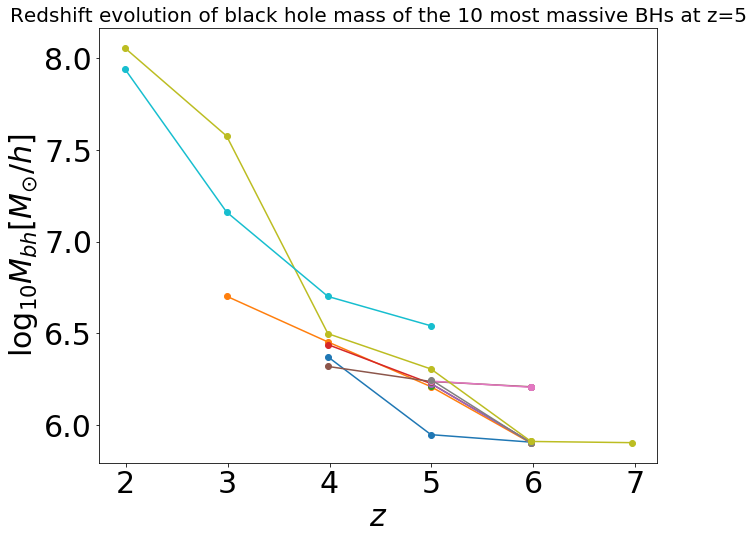

In [9]:
z_latest=0.6
z_earliest=8
z_no_of_bins=10
p_type=5

desired_property='BH_Mass'

f,ax=plt.subplots(figsize=(10,8))

ax.set_title('Redshift evolution of black hole mass of the 10 most massive BHs at z=5',fontsize=20)

for p_id_to_be_tracked in p_ids_to_be_tracked:
    print(p_id_to_be_tracked)
    bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)
    plt.plot(z_history,numpy.log10(bhmass_history)+10,marker='o')
    
ax.tick_params(labelsize=30)
ax.set_xlabel('$z$',fontsize=30)
ax.set_ylabel('$\log_{10}M_{bh}[M_{\odot}/h]$',fontsize=30)
 
    

# Cell 9: Tracing the evolution of particle properties across the available redshift snapshots . Currently set to trace the host halo mass.  

100002101088
100002105747


/apps/jupyterhub/1.0.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


100002124599
100002101891
100002100369
100002099270
100002095796
100002103623
100002030429
100002108110


Text(0, 0.5, '$\\log_{10}M_{h}[M_{\\odot}/h]$')

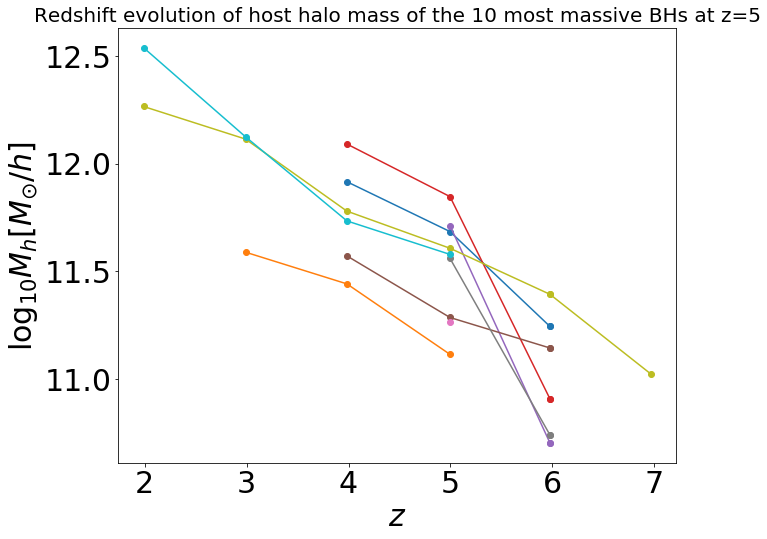

In [12]:
z_latest=0.6
z_earliest=8
z_no_of_bins=10
p_type=5

desired_property='BH_HostHaloMass'
f,ax=plt.subplots(figsize=(10,8))
ax.set_title('Redshift evolution of host halo mass of the 10 most massive BHs at z=5',fontsize=20)
for p_id_to_be_tracked in p_ids_to_be_tracked[:]:
    print(p_id_to_be_tracked)
    bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)
    plt.plot(z_history,numpy.log10(bhmass_history)+10,marker='o')
    
ax.tick_params(labelsize=30)
ax.set_xlabel('$z$',fontsize=30)
ax.set_ylabel('$\log_{10}M_{h}[M_{\odot}/h]$',fontsize=30)
 
    

In [13]:
basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'
desired_id=p_ids_to_be_tracked[9]
BH_ids_for_id,scale_factors_for_id,BH_masses_for_id,BH_mdots_for_id,rhos_for_id,sound_speeds_for_id,merging_times=arepo_package.get_blackhole_history_high_res(basePath,desired_id)

In [14]:
z_latest=0.6
z_earliest=8
z_no_of_bins=10
p_type=5
p_id_to_be_tracked=desired_id
desired_property='BH_Mass'
bhmass_history,z_history=arepo_package.get_particle_history(z_latest,z_earliest,z_no_of_bins,p_type,p_id_to_be_tracked,desired_property,basePath)


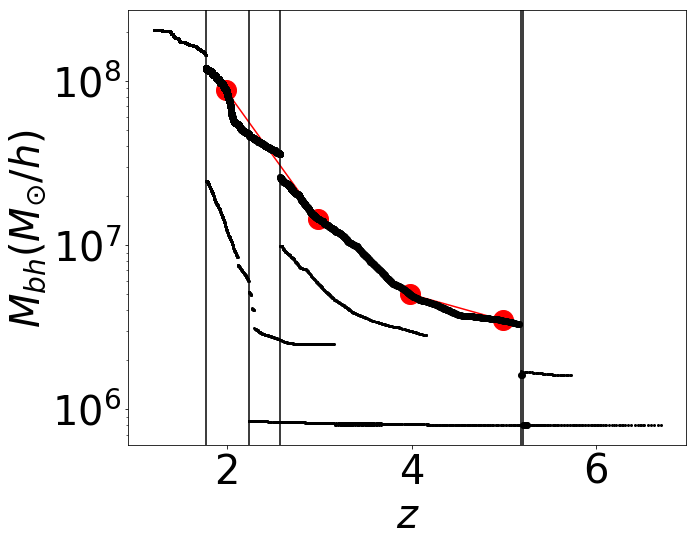

In [21]:
redshifts_for_id=1./scale_factors_for_id-1
f,ax=plt.subplots(1,1,figsize=(10,8))
ax.errorbar(redshifts_for_id,BH_masses_for_id*1e10,marker='o',linestyle=' ',color='black',ms=2)
extract_main=desired_id==BH_ids_for_id
ax.errorbar(redshifts_for_id[extract_main],BH_masses_for_id[extract_main]*1e10,marker='o',linestyle=' ',color='black')

ax.plot(z_history,bhmass_history*1e10,marker='o',color='red',ms=20)

for times in merging_times:
    ax.axvline(1./times-1,color='black')
    
ax.set_xlabel('$z$',fontsize=40)

ax.set_ylabel('$M_{bh}(M_{\odot}/h)$',fontsize=40)

ax.set_yscale('log')
ax.tick_params(labelsize=40)

In [10]:
bhmass_history

z_history

array([4.99593347])

# Making images for spatial distributions of haloes and subhaloes

In [2]:
particle_property='Coordinates'

p_type=1

desired_redshift=0.6

group_type='subhalo'

basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'



def get_group_ids(output_path,z_current,N,group_type='group'):    
    if (group_type=='groups'):              
        masstype,output_redshift=(arepo_package.get_group_property(output_path,'GroupMassType', desired_redshift));
    elif (group_type=='subhalo'):              
        masstype,output_redshift=(arepo_package.get_subhalo_property(output_path,'SubhaloMassType', desired_redshift));
        subhalo_group_number,output_redshift=(arepo_package.get_subhalo_property(output_path,'SubhaloGrNr', desired_redshift));
        
    mass=masstype[:,1]
    indices=numpy.argsort(mass)[-N:]
    if (group_type=='groups'):   
        return indices
    if (group_type=='subhalo'):  
        return indices,subhalo_group_number[indices]

basePath = '/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

group_ids,subhalo_group_number=get_group_ids(basePath,desired_redshift,100,group_type='subhalo');



boxsize=arepo_package.get_box_size(basePath)





Below are the list of properties
dict_keys(['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicit

In [4]:
#particle_property='Coordinates'

#p_type=4

#desired_redshift=0.6

subhalo_index=43

#group_type='subhalo'

#basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'


subhalo_particles,group_particles,output_redshift=arepo_package.get_particle_property_within_groups(basePath,particle_property,p_type,desired_redshift,subhalo_index,group_type='subhalo',list_all=True)

boxsize=arepo_package.get_box_size(basePath)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfm

Text(0, 0.5, '$Y-Y_{\\mathrm{COM}}$')

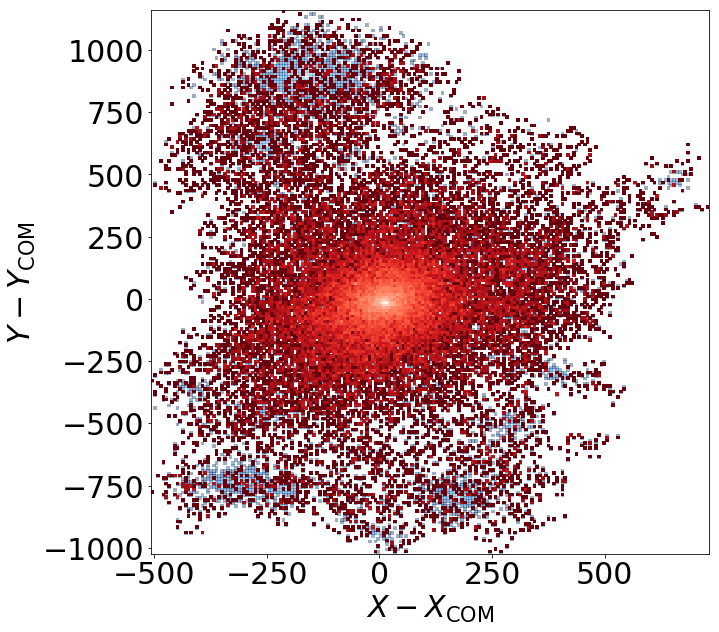

In [5]:

f,ax=plt.subplots(figsize=(10,10))



arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,NBINS=200,colormap='Blues_r',opacity=0.4)

arepo_package.make_image(subhalo_particles,group_particles,'xy',ax,boxsize,NBINS=200,colormap='Reds_r',opacity=1)

arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,NBINS=100,colormap='Blues_r',opacity=0)

ax.tick_params(labelsize=30)

ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)

ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)



In [5]:
subhalo_index=10
p_type=1

#group_type='subhalo'

#basePath='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/L25_n128/output/'

group_particles,output_redshift=arepo_package.get_particle_property_within_groups(basePath,particle_property,p_type,desired_redshift,subhalo_index,group_type='groups',list_all=True)

boxsize=arepo_package.get_box_size(basePath)

Desired redshift:  0.6
Output redshift:  0.6960833050615955
Output snapshot:  13
Desired redshift:  0.6
Output redshift:  0.6960833050615955
Output snapshot:  13
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


Text(0, 0.5, '$Y-Y_{\\mathrm{COM}}$')

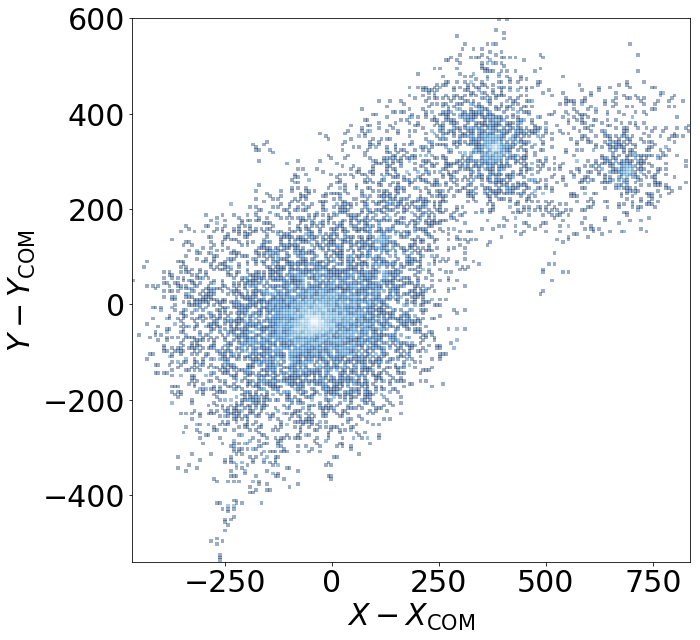

In [6]:

f,ax=plt.subplots(figsize=(10,10))

arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,NBINS=200,colormap='Blues_r',opacity=0.4)

ax.tick_params(labelsize=30)

ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)

ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)

# Black hole merger events

In [7]:
scale_fac_complete,primary_mass,secondary_mass,primary_id,secondary_id,file_id_complete=arepo_package.get_merger_events(basePath)

Text(0, 0.5, '$\\log_{10}M_{\\mathrm{primary}}$')

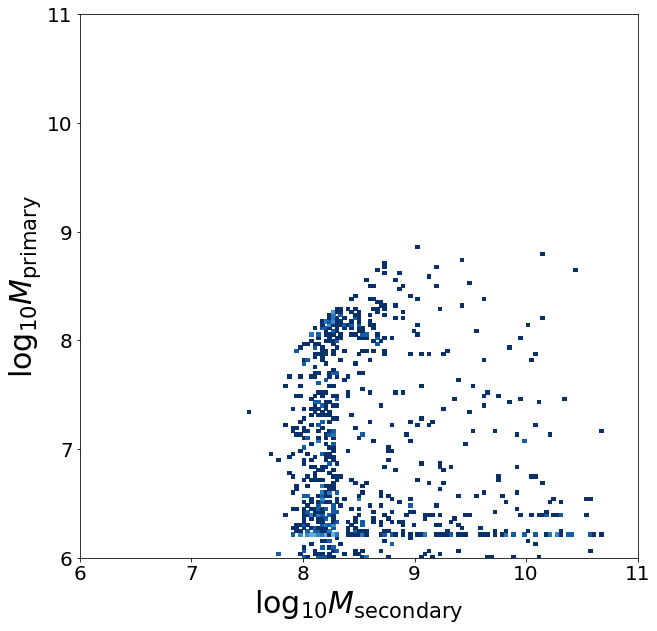

In [38]:
f,ax=plt.subplots(figsize=(10,10))
NBINS=100
colormap='Blues_r'
opacity=1
ax.hist2d(numpy.log10(primary_mass*1e10),numpy.log10(secondary_mass*1e10), bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap=colormap,alpha=opacity)
ax.set_xlim(6,11)
ax.set_ylim(6,11)
ax.tick_params(labelsize=20)
ax.set_xlabel('$\log_{10}M_{\mathrm{secondary}}$',fontsize=30)
ax.set_ylabel('$\log_{10}M_{\mathrm{primary}}$',fontsize=30)

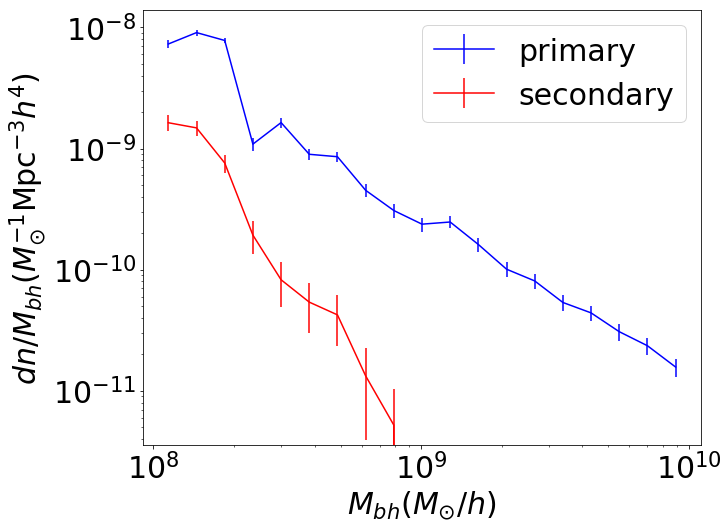

In [39]:
f,ax=plt.subplots(figsize=(10,8))
BHM,BHMF,dBHMF=arepo_package.mass_function(primary_mass,10,20,8,10)
ax.errorbar(BHM,BHMF,dBHMF,color='blue',label='primary')
BHM,BHMF,dBHMF=arepo_package.mass_function(secondary_mass,10,20,8,10)
ax.errorbar(BHM,BHMF,dBHMF,color='red',label='secondary')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('$dn/M_{bh}(M_{\odot}^{-1}\mathrm{Mpc}^{-3}h^4)$',fontsize=30)
ax.set_xlabel('$M_{bh}(M_{\odot}/h)$',fontsize=30)
ax.tick_params(labelsize=30)
ax.legend(fontsize=30,loc='upper right')